In [3]:
import pandas as pd
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

option = webdriver.ChromeOptions()
option.add_argument("start-maximized")


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=option)
driver.get('https://www.google.com/')

In [4]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

#### Find Books

In [13]:
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [14]:
book_categories

[<selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1592")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1692")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1693")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1694")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1695")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1e47939f0fd9a621c", element="B2B2D248FF7965A5400581B2962D0365_element_1696")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c717f7ef538040c1

In [15]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [16]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [17]:
driver.get(book_categories[0].get_attribute('href'))

In [18]:
character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [19]:
character_elements[0].text

'Adalia'

#### Full code

In [26]:
# Create driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=option)
driver.get('https://www.google.com/')

#Go to characters in the book pages
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

#Find books
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

books =[]
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [27]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [28]:
character_list = []

for book in books:
    driver.get(book['url'])
    
    character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    
    for elements in character_elements:
        character_list.append({'book': book['book_name'], 'character': elements.text})

In [29]:
character_list

[{'book': 'Category:Baptism of Fire characters', 'character': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aglaïs'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Albrich'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Amavet'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Angus Bri Cri'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anna Kameny'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anzelm Aubry'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Artaud Terranova'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Asse'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Assire var Anahid'},
 

In [30]:
pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1271,Category:Time of Contempt characters,Yanna of Murivel
1272,Category:Time of Contempt characters,Yarpen Zigrin
1273,Category:Time of Contempt characters,Yennefer of Vengerberg
1274,Category:Time of Contempt characters,Yiolenta Suarez


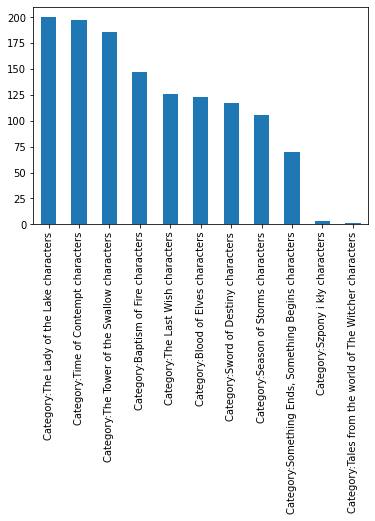

In [31]:
#Which books have the most characters and which ones have the least?
import matplotlib.pyplot as plt

character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()

In [33]:
# Save the DataFrame to a CSV file
character_df.to_csv('characters.csv', index=False)